In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
data = pd.read_csv("/Users/umairabid/Desktop/untitled folder/Insurance-fraud-detection/insurance.csv")

In [3]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
data.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [7]:
data.duplicated().sum()

0

In [8]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [9]:
# Drop irrelevant column _c39
data_cleaned = data.drop(columns=['_c39'])


In [10]:
# Replace ? in categorical columns with NaN for handling missing data
data_cleaned.replace('?', pd.NA, inplace=True)



In [11]:
# Encode target variable `fraud_reported` ('Y' -> 1, 'N' -> 0)
data_cleaned['fraud_reported'] = data_cleaned['fraud_reported'].map({'Y': 1, 'N': 0})



In [12]:
# Identify categorical columns to encode
categorical_cols = data_cleaned.select_dtypes(include='object').columns



In [13]:
# Apply Label Encoding to categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data_cleaned[col] = le.fit_transform(data_cleaned[col].astype(str))
    label_encoders[col] = le



In [14]:
# Splitting the dataset into features and target variable
X = data_cleaned.drop(columns=['fraud_reported'])
y = data_cleaned['fraud_reported']



In [15]:
# Train-test split (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify pre-processing
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 29 to 102
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           800 non-null    int64  
 1   age                          800 non-null    int64  
 2   policy_number                800 non-null    int64  
 3   policy_bind_date             800 non-null    int64  
 4   policy_state                 800 non-null    int64  
 5   policy_csl                   800 non-null    int64  
 6   policy_deductable            800 non-null    int64  
 7   policy_annual_premium        800 non-null    float64
 8   umbrella_limit               800 non-null    int64  
 9   insured_zip                  800 non-null    int64  
 10  insured_sex                  800 non-null    int64  
 11  insured_education_level      800 non-null    int64  
 12  insured_occupation           800 non-null    int64  
 13  insured_hobbies         

In [16]:
X_train.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
29,241,45,596785,911,0,2,2000,1104.50,0,432211,...,2,2,1,91650,14100,14100,63450,0,33,2011
535,65,23,876699,390,2,1,1000,1099.95,0,473109,...,1,0,2,52400,6550,6550,39300,0,23,2005
695,289,45,943425,386,2,1,2000,1221.41,0,466289,...,2,1,1,2700,300,300,2100,6,6,2006
557,63,26,550930,238,0,2,500,1500.04,6000000,613826,...,0,2,2,5160,860,860,3440,0,33,2004
836,257,43,797636,114,1,0,1000,974.84,0,468984,...,0,1,2,85320,21330,7110,56880,9,29,2006


In [17]:
# Initialize models
log_reg = LogisticRegression(max_iter=1000, random_state=42)
dec_tree = DecisionTreeClassifier(random_state=42)
rand_forest = RandomForestClassifier(random_state=42)


In [18]:
# Train models
log_reg.fit(X_train, y_train)
dec_tree.fit(X_train, y_train)
rand_forest.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(random_state=42)

In [19]:
# Predict on test set
y_pred_log_reg = log_reg.predict(X_test)
y_pred_dec_tree = dec_tree.predict(X_test)
y_pred_rand_forest = rand_forest.predict(X_test)


In [20]:
# Evaluate models
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_dec_tree = accuracy_score(y_test, y_pred_dec_tree)
accuracy_rand_forest = accuracy_score(y_test, y_pred_rand_forest)

In [21]:
# Collect results
results = {
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Accuracy": [accuracy_log_reg, accuracy_dec_tree, accuracy_rand_forest]
}


In [22]:
classification_reports = {
    "Logistic Regression": classification_report(y_test, y_pred_log_reg),
    "Decision Tree": classification_report(y_test, y_pred_dec_tree),
    "Random Forest": classification_report(y_test, y_pred_rand_forest)
}


In [24]:
results

{'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
 'Accuracy': [0.73, 0.74, 0.73]}

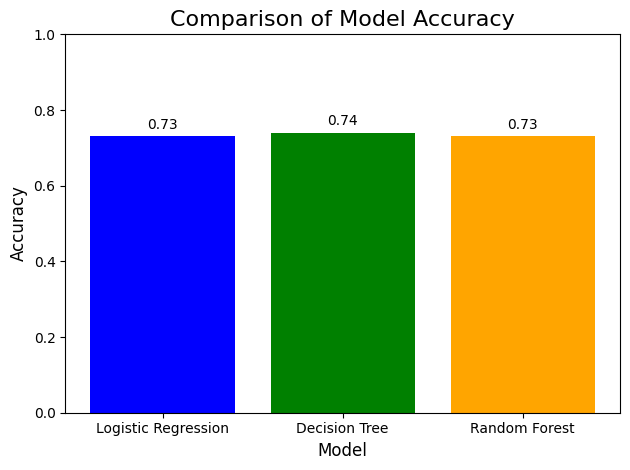

In [28]:
# Plot
plt.bar(results['Model'], results['Accuracy'], color=['blue', 'green', 'orange'])
plt.ylim(0, 1)  # Set y-axis range to 0-1 for clarity
plt.title('Comparison of Model Accuracy', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Annotate accuracy values on bars
for i, acc in enumerate(results['Accuracy']):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()
